# **EDA**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Load dataset
file_path = '/content/drive/MyDrive/Sequence_Data/drug_data.csv'
df = pd.read_csv(file_path, encoding='utf-8')

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25215 entries, 0 to 25214
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   품목일련번호          25215 non-null  int64  
 1   품목명             25215 non-null  object 
 2   업소일련번호          25215 non-null  int64  
 3   업소명             25215 non-null  object 
 4   성상              25215 non-null  object 
 5   큰제품이미지          25215 non-null  object 
 6   표시앞             25214 non-null  object 
 7   표시뒤             25213 non-null  object 
 8   의약품제형           25215 non-null  object 
 9   색상앞             25215 non-null  object 
 10  색상뒤             25215 non-null  object 
 11  분할선앞            25215 non-null  object 
 12  분할선뒤            25215 non-null  object 
 13  크기장축            25215 non-null  object 
 14  크기단축            25215 non-null  object 
 15  크기두께            25215 non-null  object 
 16  이미지생성일자(약학정보원)  25215 non-null  int64  
 17  분류번호            25215 non-null 

In [24]:
display(df[['품목일련번호', '의약품제형']].head())

,품목일련번호,의약품제형
0,200808876,원형
1,200808877,원형
2,200808948,원형
3,200809076,장방형
4,200809361,원형


In [25]:
display(df[['품목일련번호', '의약품제형']].tail())

,품목일련번호,의약품제형
25210,202301799,타원형
25211,202301798,타원형
25212,202301962,원형
25213,202301961,원형
25214,201501680,장방형


In [28]:
# Check missing values
print(df[['품목일련번호', '의약품제형']].isna().sum())

품목일련번호    0
의약품제형     0
dtype: int64


In [29]:
# Check duplicated values
display(df[df.duplicated(subset='품목일련번호')][['품목일련번호', '의약품제형']])

,품목일련번호,의약품제형
408,200906540,원형
1823,200209641,사각형
1824,200209641,사각형
6905,200401818,장방형
7117,200202793,원형
7234,200201478,원형
7237,200300393,장방형
15363,201706587,장방형
15364,201706587,장방형
15365,201706587,원형


In [31]:
# Check types of shape
print(df['의약품제형'].value_counts())

의약품제형
원형      9908
장방형     7112
타원형     6712
기타       488
사각형      281
팔각형      275
삼각형      235
마름모형      91
오각형       58
육각형       50
반원형        3
-          2
Name: count, dtype: int64


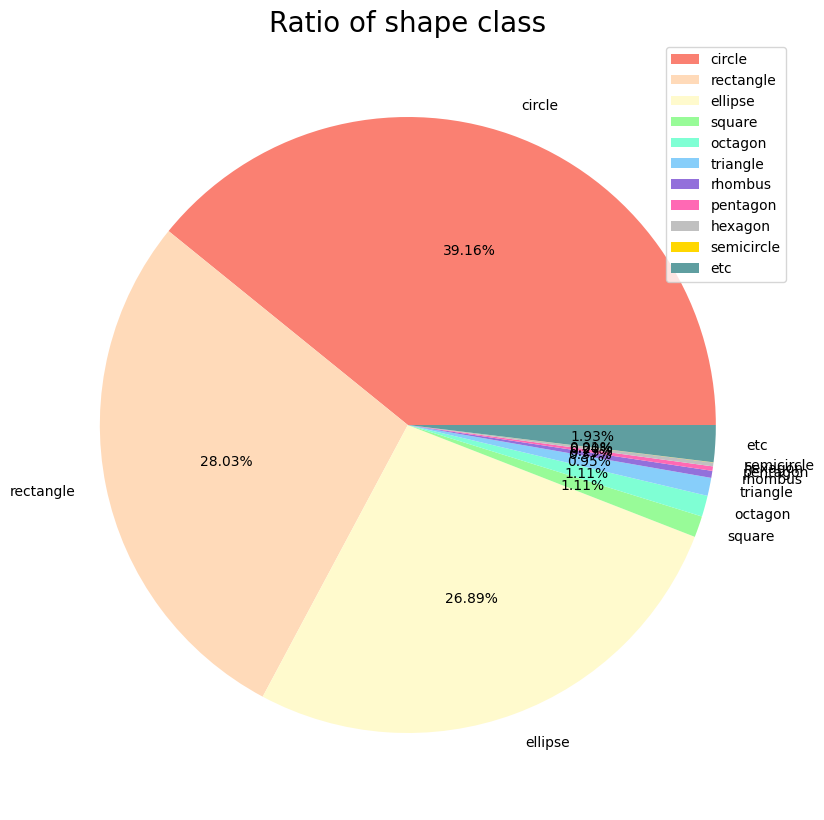

In [49]:
# Visualize ratio of shape class
# rat = [9908, 7112, 6712, 281, 275, 235, 91, 58, 50, 3, 490]   # when duplicated values did not removed
rat = [9706, 6948, 6666, 276, 274, 235, 91, 58, 50, 3, 479]     # when duplicated values removed
labels = ['circle', 'rectangle', 'ellipse', 'square', 'octagon', 'triangle', 'rhombus', 'pentagon', 'hexagon', 'semicircle', 'etc']
colors = ['salmon', 'peachpuff', 'lemonchiffon', 'palegreen', 'aquamarine', 'lightskyblue', 'mediumpurple', 'hotpink', 'silver', 'gold', 'cadetblue']
plt.figure(figsize=(10, 10))
plt.pie(rat, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Ratio of shape class', fontsize=20)
plt.legend(loc='best')
plt.show()

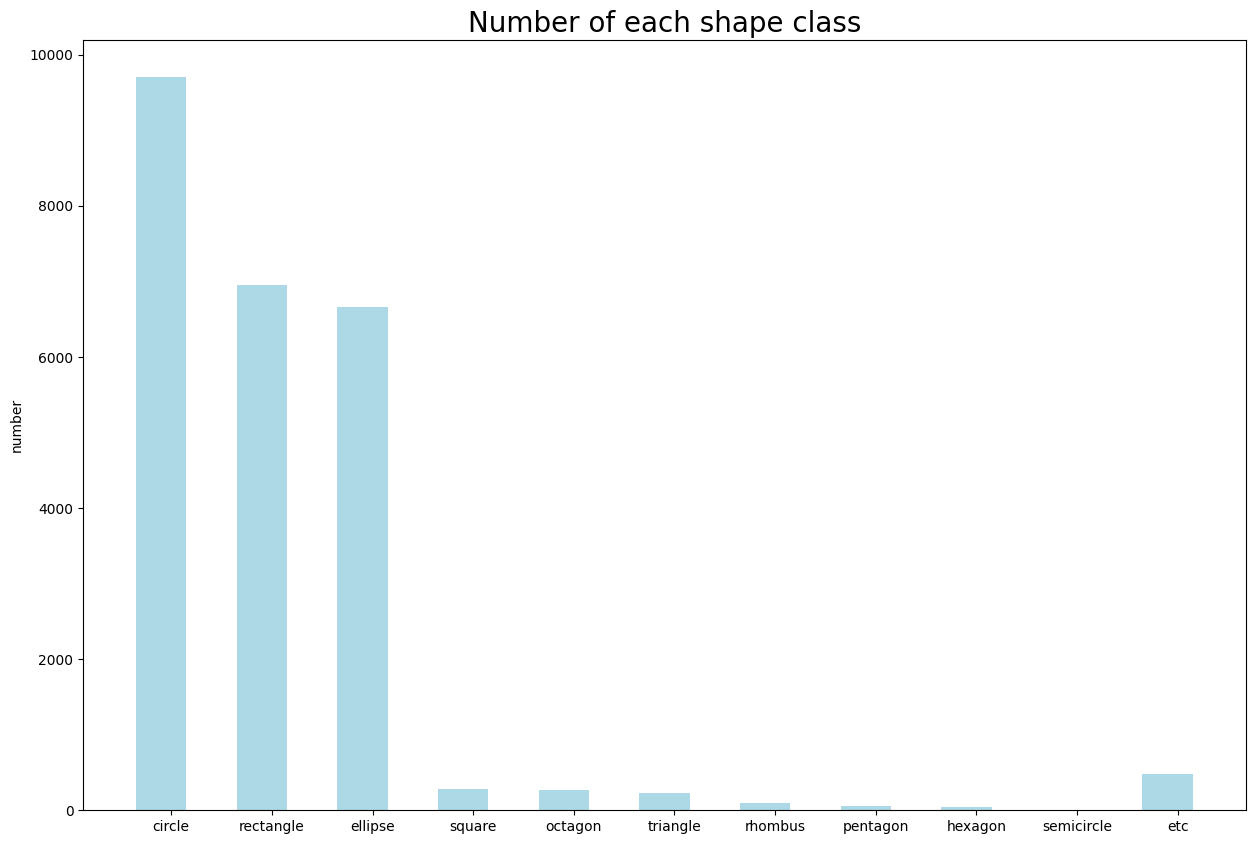

In [44]:
# Visualize number of each shape class
labels = ['circle', 'rectangle', 'ellipse', 'square', 'octagon', 'triangle', 'rhombus', 'pentagon', 'hexagon', 'semicircle', 'etc']
# rat = [9908, 7112, 6712, 281, 275, 235, 91, 58, 50, 3, 490]   # when duplicated values did not removed
rat = [9706, 6948, 6666, 276, 274, 235, 91, 58, 50, 3, 479]     # when duplicated values removed
plt.figure(figsize=(15, 10))
plt.bar(labels, rat, color='lightblue', width=0.5)
plt.ylabel('number')
plt.title('Number of each shape class', fontsize=20)
plt.xticks([i + 0.1 for i, _ in enumerate(labels)], labels)
plt.show()

# **Modeling**

In [ ]:
import numpy as np
from keras.preprocessing import image
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils, models, layers, optimizers

In [ ]:
# Load images
images = [image.load_img(p, target_size=(130, 70))   # 780, 420
          for p in glob('data/shape/circle/*png') + glob('data/shape/rectangle/*png') + glob('data/shape/ellipse/*png') + glob('data/shape/square/*png')
          + glob('data/shape/octagon/*png') + glob('data/shape/triangle/*png') + glob('data/shape/rhombus/*png') + glob('data/shape/pentagon/*png')
          + glob('data/shape/hexagon/*png') + glob('data/shape/semicircle/*png') + glob('data/shape/etc/*png')]
image_vector = np.asarray([image.img_to_array(img) for img in images])
plt.imshow(image_vector[0] / 255)

# Set labels
y = [10] * 9706 + [9] * 6948 + [8] * 6666 + [7] * 276 + [6] * 274 + [5] * 235 + [4] * 91 + [3] * 58 + [2] * 50 + [1] * 3 + [0] * 479

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=42)

# Scale the input data
X_train, X_test = X_train / 255, X_test / 255

# Convert to categorical
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# Build model
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

# Initialize and fit the model
model = build((130, 70, 3), 11)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])       # 0.14497537910938263
print("Test accuracy:", score[1])   # 0.9685357213020325